In [37]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2

In [38]:
images = [] # liste pour stocker toutes les images
labels = [] # liste pour stocker les labels de chaque image

dataset_directory = "images"

for breed in os.listdir(dataset_directory):
    breed_directory = os.path.join(dataset_directory, breed)
    if os.path.isdir(breed_directory):
        for image_filename in os.listdir(breed_directory):
            img = cv2.imread(os.path.join(breed_directory, image_filename))
            if img is not None:
                images.append(img)
                labels.append(breed)

In [39]:
len(images)

1919

In [40]:
labels = np.array(labels)
class_names = np.unique(labels)
class_names

array(['n02085620-Chihuahua', 'n02085782-Japanese_spaniel',
       'n02085936-Maltese_dog', 'n02086079-Pekinese',
       'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel',
       'n02086910-papillon', 'n02087046-toy_terrier',
       'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound'],
      dtype='<U29')

In [41]:
#Redimensionnement des images

image_size = (224, 224) # Vous pouvez choisir une autre taille

images = [cv2.resize(img, image_size) for img in images]

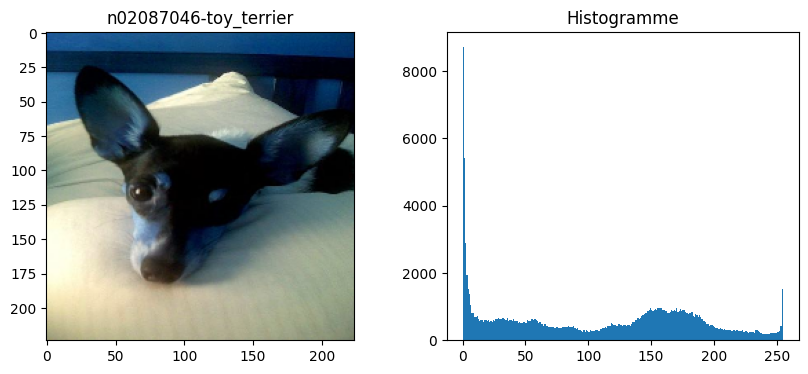

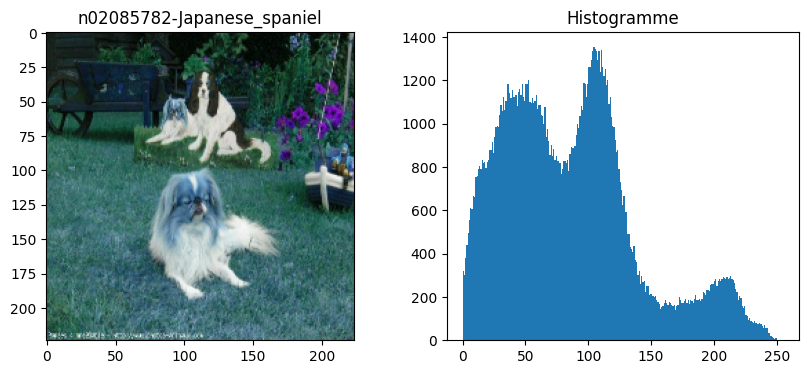

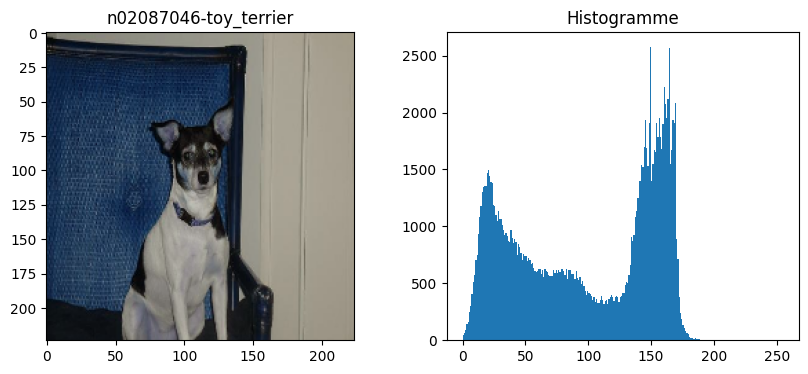

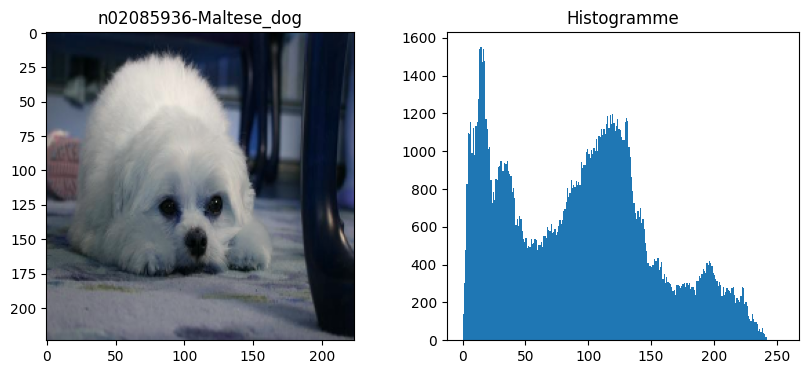

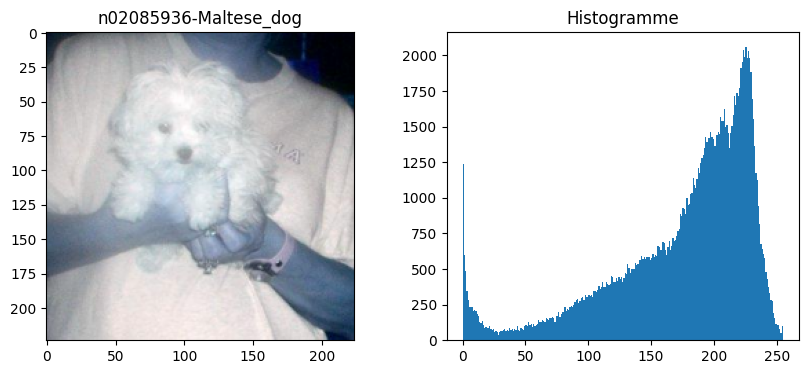

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Choisis un index au hasard dans le jeu de données
index = np.random.choice(np.arange(len(images)), size=5, replace=False)

# Affiche les images et leurs histogrammes correspondants
for i in index:
    img = images[i]
    label = labels[i]

    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(label)
    
    plt.subplot(1, 2, 2)
    n, bins, patches = plt.hist(img.flatten(), bins=range(256))
    plt.title('Histogramme')
    
    plt.show()

In [43]:
#Normalisation des images

for i in range(len(images)):
    images[i] = images[i] / 255.0

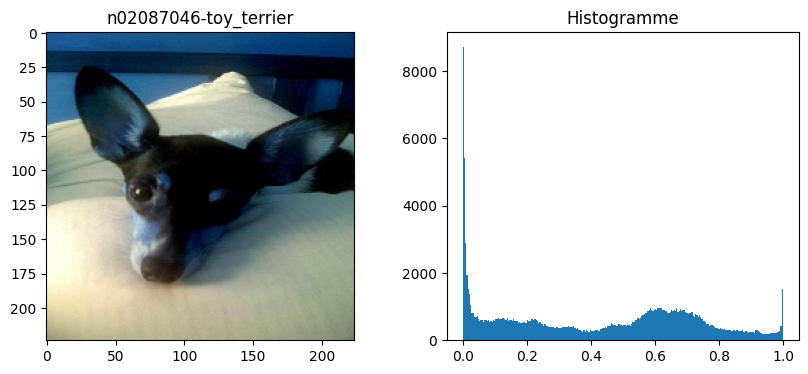

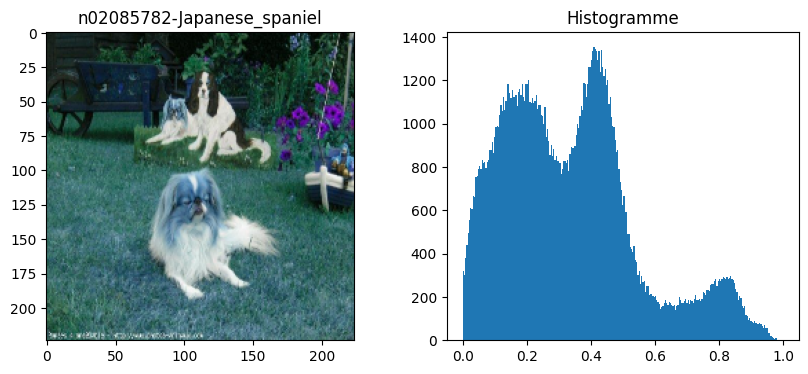

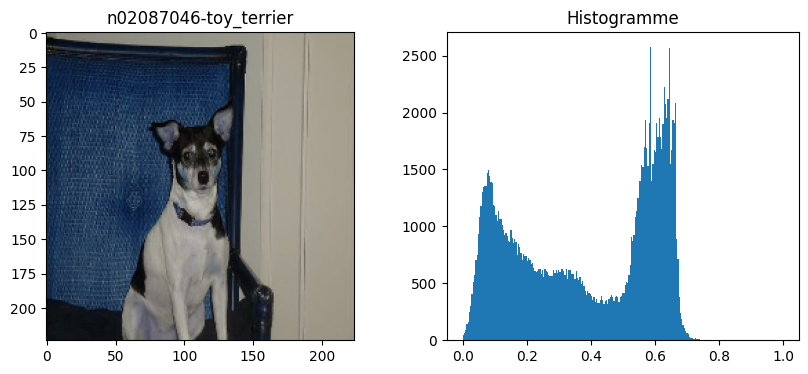

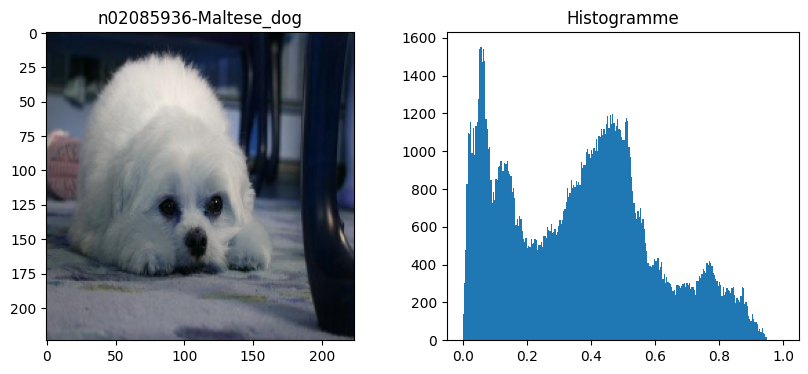

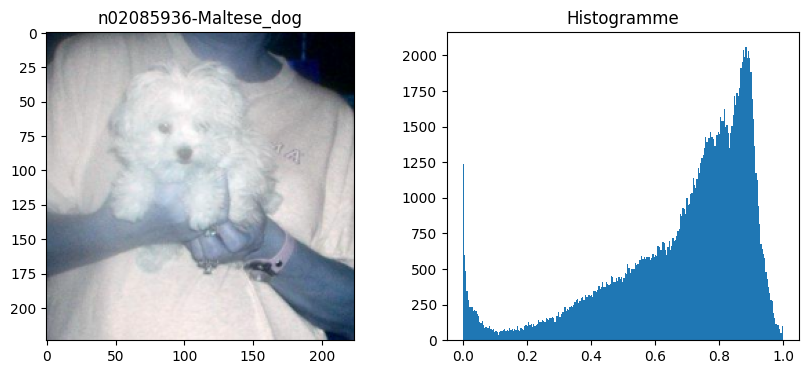

In [44]:
def display_images_and_histograms(images, labels, indices):
    """
    Affiche les images et leurs histogrammes correspondants.

    Parameters:
    - images : une liste d'images.
    - labels : une liste de labels correspondant aux images.
    - indices : une liste d'indices des images à afficher.
    """

    for i in indices:
        img = images[i]
        label = labels[i]

        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title(label)

        plt.subplot(1, 2, 2)
        n, bins, patches = plt.hist(img.flatten(), bins=np.linspace(0, 1, 256))
        plt.title('Histogramme')

        plt.show()

display_images_and_histograms(images, labels, index)

In [45]:
from PIL import Image, ImageOps

def apply_autocontrast(image):
    """
    Applique l'autocontraste à une image.

    Parameters:
    - image : une image PIL.

    Returns:
    - une image PIL avec autocontraste appliqué.
    """

    # Convertir l'image en une image PIL
    pil_image = Image.fromarray((image * 255).astype(np.uint8))

    # Appliquer l'autocontraste
    autocontrasted_image = ImageOps.autocontrast(pil_image)

    # Convertir l'image PIL en tableau numpy
    autocontrasted_image = np.array(autocontrasted_image) / 255.0

    return autocontrasted_image

# Appliquer l'autocontraste à toutes les images
images = [apply_autocontrast(img) for img in images]


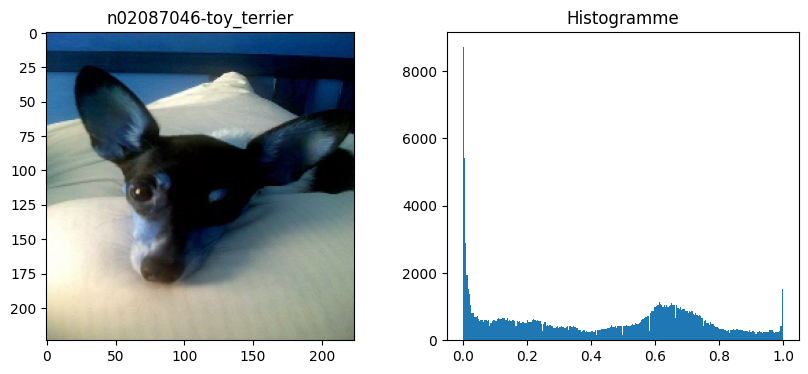

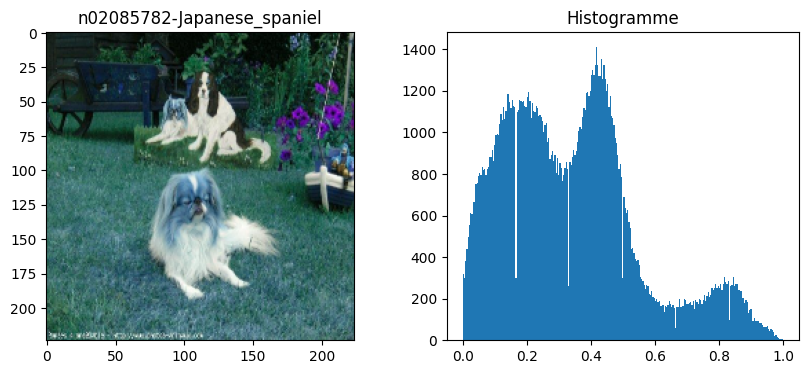

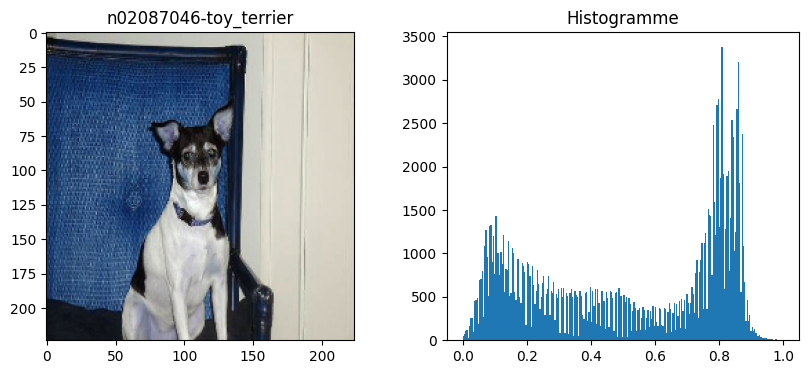

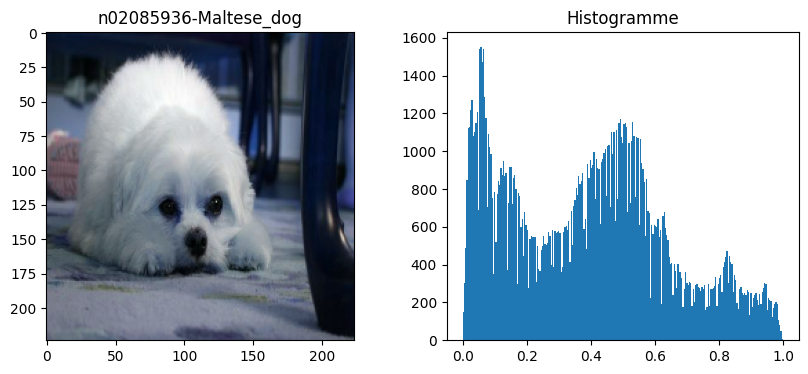

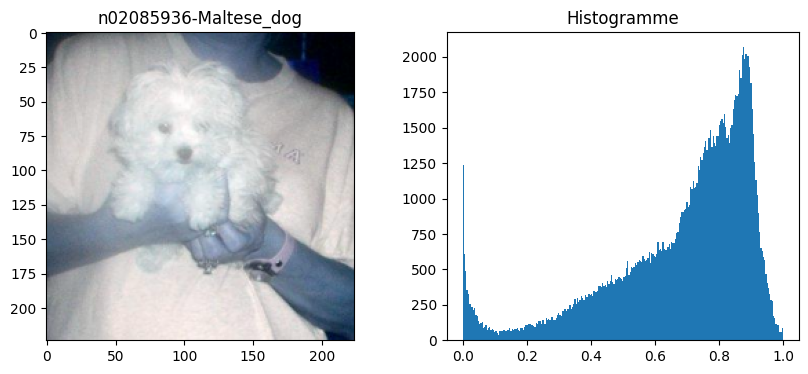

In [46]:
display_images_and_histograms(images, labels, index)

In [47]:
def apply_equalization(image):
    """
    Applique l'égalisation d'histogramme à une image.

    Parameters:
    - image : une image PIL.

    Returns:
    - une image PIL avec égalisation d'histogramme appliquée.
    """

    # Convertir l'image en une image PIL
    pil_image = Image.fromarray((image * 255).astype(np.uint8))

    # Appliquer l'égalisation d'histogramme
    equalized_image = ImageOps.equalize(pil_image)

    # Convertir l'image PIL en tableau numpy
    equalized_image = np.array(equalized_image) / 255.0

    return equalized_image

# Appliquer l'égalisation d'histogramme à toutes les images
images = [apply_equalization(img) for img in images]

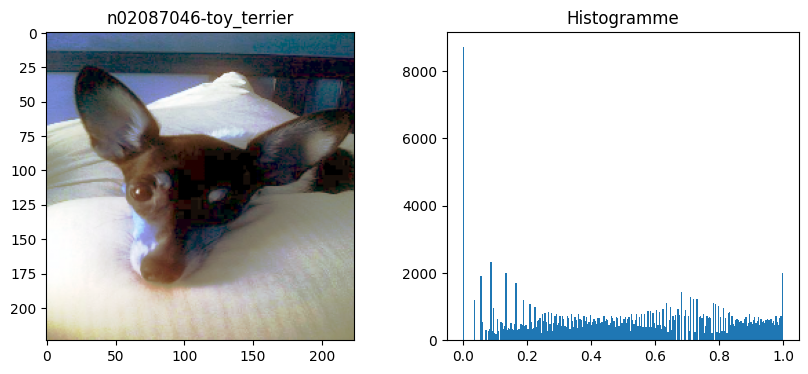

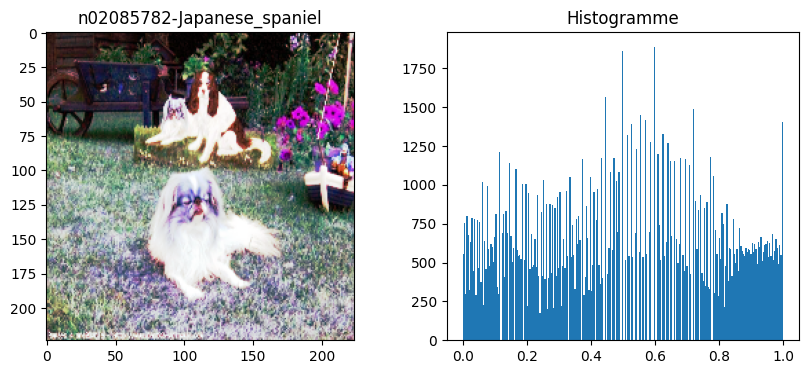

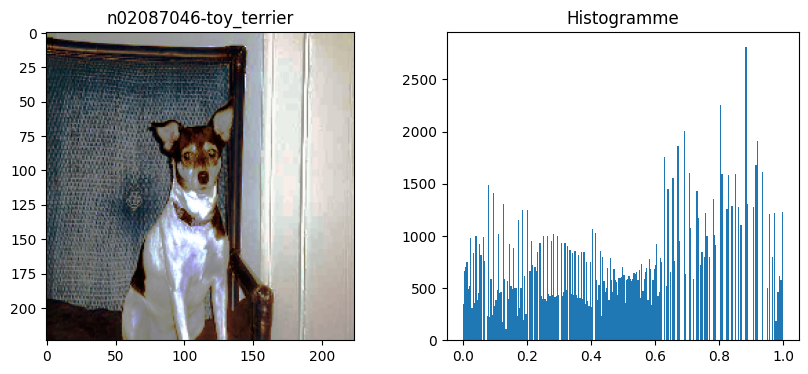

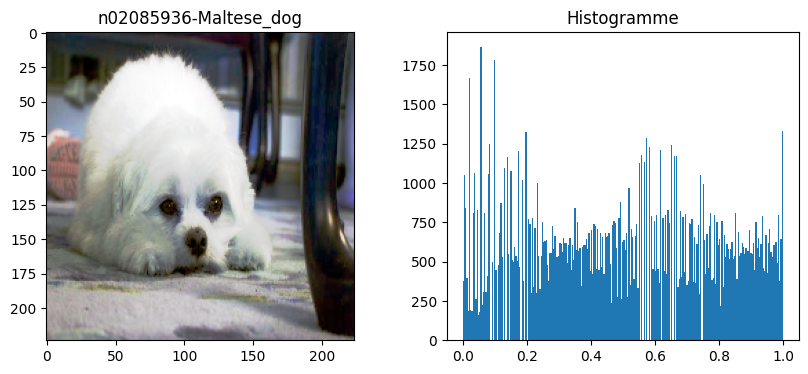

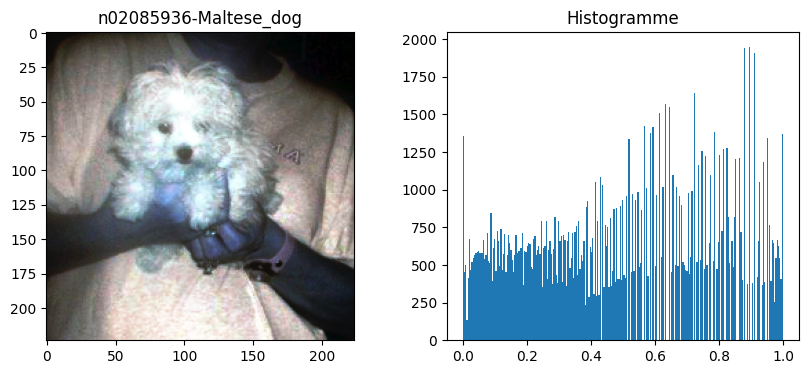

In [48]:
display_images_and_histograms(images, labels, index)

In [49]:
from skimage.restoration import denoise_nl_means
from skimage import img_as_float

def apply_nl_means_denoising(image):
    """
    Applique le débruitage NL-means à une image.

    Parameters:
    - image : une image PIL.

    Returns:
    - une image PIL avec le débruitage NL-means appliqué.
    """

    # Convertir l'image en format float
    image_float = img_as_float(image)

    # Appliquer le débruitage NL-means
    denoised_image = denoise_nl_means(image_float, h=0.08, fast_mode=True, 
                                      patch_size=5, patch_distance=3, channel_axis=-1)

    return denoised_image

# Appliquer le débruitage NL-means à toutes les images
images = [apply_nl_means_denoising(img) for img in images]


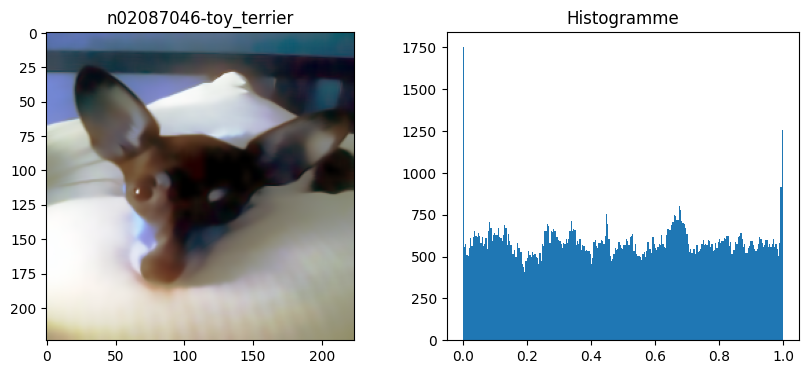

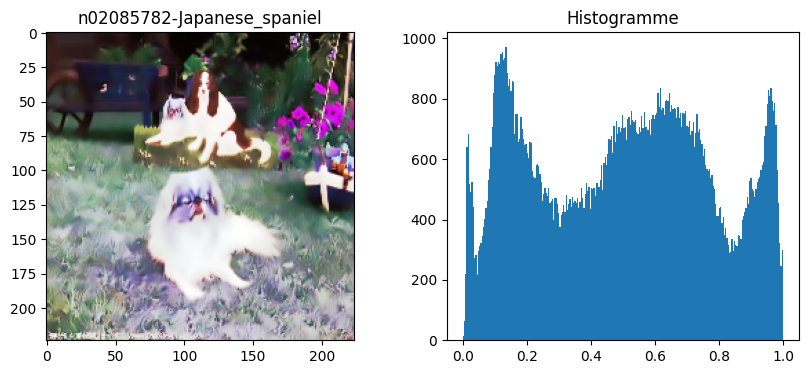

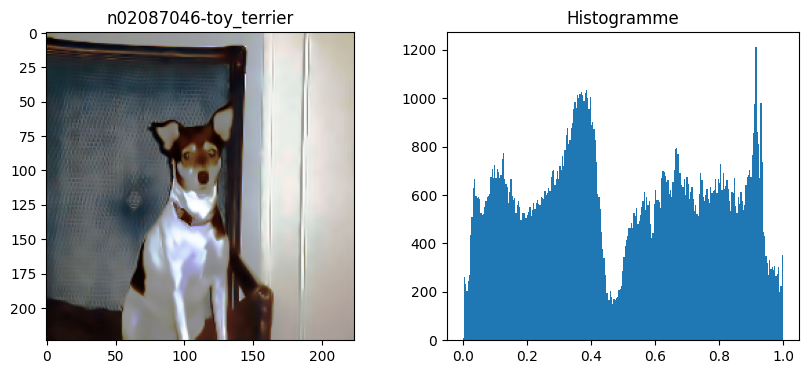

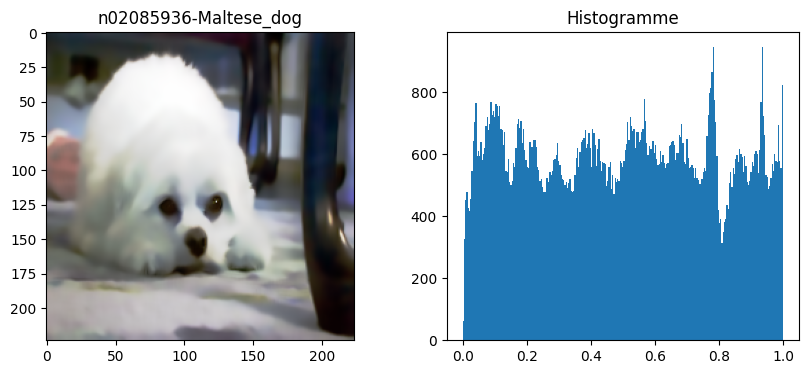

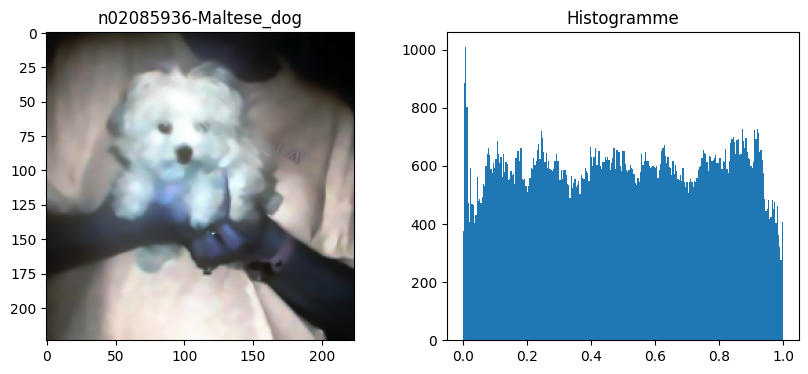

In [50]:
display_images_and_histograms(images, labels, index)

In [51]:
def apply_cropping(image):
    """
    Applique un recadrage au centre de l'image.

    Parameters:
    - image : un tableau numpy représentant l'image.

    Returns:
    - un tableau numpy représentant l'image recadrée.
    """
    width, height, _ = image.shape
    new_width = new_height = min(width, height)
    left = int((width - new_width)/2)
    top = int((height - new_height)/2)
    right = int((width + new_width)/2)
    bottom = int((height + new_height)/2)

    image = image[left:right, top:bottom]
    return image

def apply_mirror(image):
    """
    Applique une symétrie à l'image.

    Parameters:
    - image : un tableau numpy représentant l'image.

    Returns:
    - un tableau numpy représentant l'image symétrisée.
    """
    return np.flip(image, axis=1)

# Appliquer le recadrage et le mirroring à toutes les images
images = [apply_cropping(img) for img in images]

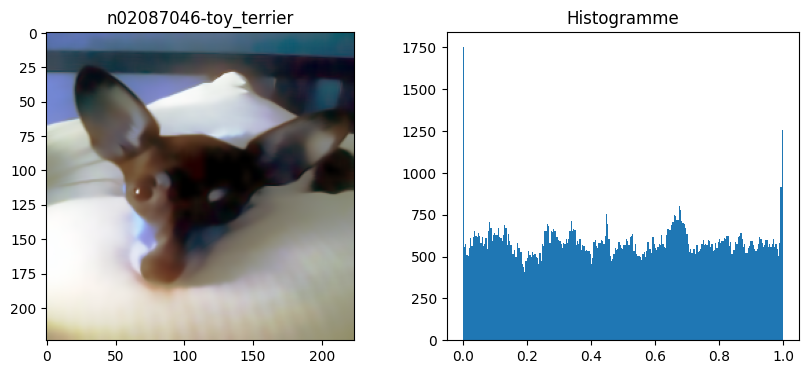

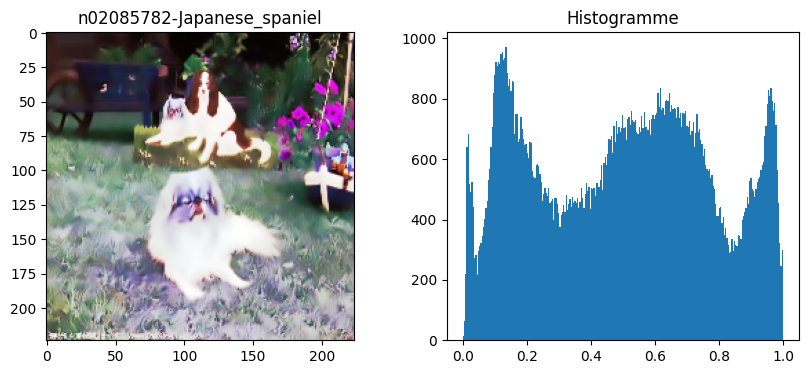

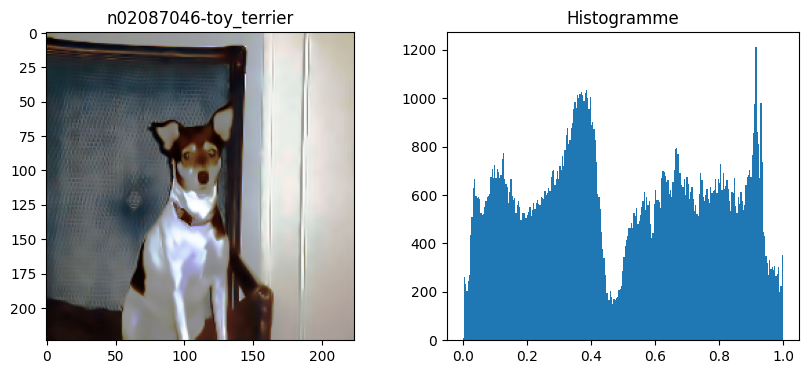

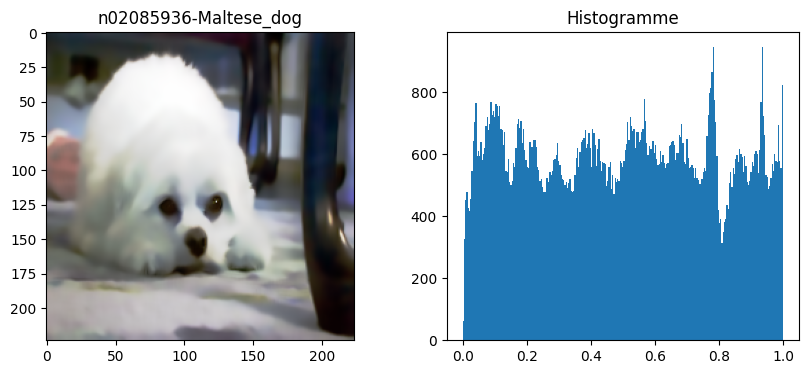

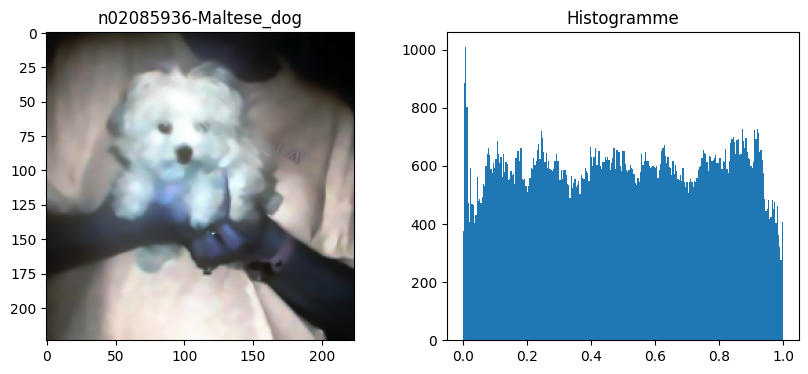

In [52]:
display_images_and_histograms(images, labels, index)

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Créer un générateur d'images augmentées
datagen = ImageDataGenerator(
    rotation_range=20,      # plage de degrés pour les rotations aléatoires
    width_shift_range=0.1,  # plage de décalage aléatoire en largeur, en fractions de la largeur totale
    height_shift_range=0.1, # plage de décalage aléatoire en hauteur, en fractions de la hauteur totale
    shear_range=0.1,        # plage de cisaillement aléatoire
    zoom_range=0.1,         # plage de zoom aléatoire
    horizontal_flip=True,   # active le retournement horizontal aléatoire
    fill_mode='nearest'     # mode de remplissage pour les pixels hors des frontières d'entrée
)

# Convertir les listes d'images et de labels en arrays numpy pour l'entraînement
images = np.array(images)
labels = np.array(labels)

# Ajuster le générateur de données sur vos données
datagen.fit(images)

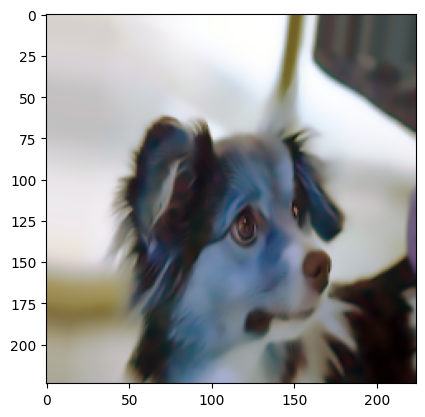

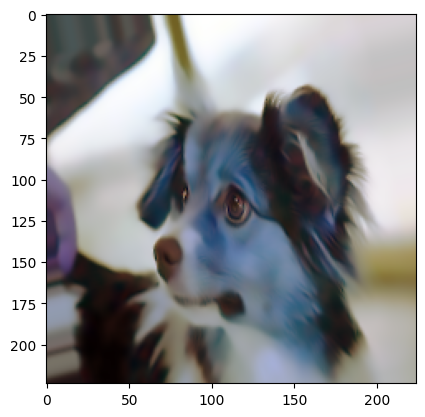

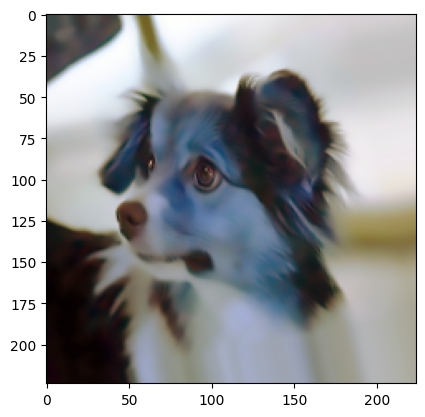

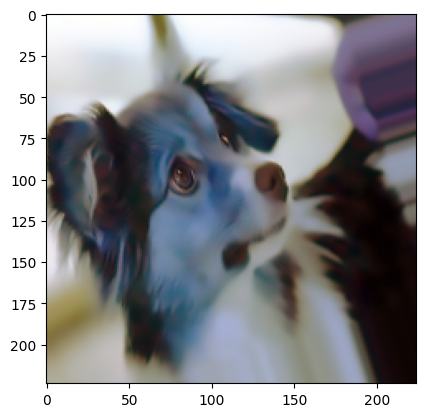

In [54]:
# Choisis une image à augmenter
image_to_augment = images[23]

# Redimensionne l'image pour ajouter une quatrième dimension (la dimension du lot)
image_to_augment = image_to_augment.reshape((1,) + image_to_augment.shape)

# Prépare un lot d'augmentations (ici, 4 augmentations)
i = 0
for batch in datagen.flow(image_to_augment, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 4 == 0: # limiter à 4 images
        break

plt.show()

In [55]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Encodage des labels en entiers puis en catégories one-hot
le = LabelEncoder()
labels_integer = le.fit_transform(labels)
labels_categorical = to_categorical(labels_integer)

In [56]:
from sklearn.model_selection import train_test_split

# Séparation du jeu de données
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = len(np.unique(labels)) # Compte le nombre unique de classes/races de chiens

model_vgg = Sequential()

# Bloc 1
model_vgg.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)))
model_vgg.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_vgg.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Bloc 2
model_vgg.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model_vgg.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model_vgg.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Bloc 3
model_vgg.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_vgg.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_vgg.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_vgg.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Bloc 4
model_vgg.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_vgg.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_vgg.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_vgg.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Bloc 5
model_vgg.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_vgg.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_vgg.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_vgg.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Bloc entièrement connecté
model_vgg.add(Flatten())
model_vgg.add(Dense(4096, activation='relu'))
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(4096, activation='relu'))
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(num_classes, activation='softmax')) # Couche de sortie

# Compiler le modèle
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [58]:
# Définir les paramètres d'entraînement
epochs = 10
batch_size = 32

# Entraînement du modèle
history_vgg = model_vgg.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
48/48 [==============================] - 280s 6s/step - loss: 3.0116 - accuracy: 0.1192 - val_loss: 2.2892 - val_accuracy: 0.1224
Epoch 2/10
48/48 [==============================] - 282s 6s/step - loss: 2.2950 - accuracy: 0.1212 - val_loss: 2.2886 - val_accuracy: 0.1536
Epoch 3/10
48/48 [==============================] - 286s 6s/step - loss: 2.2935 - accuracy: 0.1173 - val_loss: 2.2859 - val_accuracy: 0.1224
Epoch 4/10
48/48 [==============================] - 284s 6s/step - loss: 2.2941 - accuracy: 0.1212 - val_loss: 2.2864 - val_accuracy: 0.1536
Epoch 5/10
48/48 [==============================] - 284s 6s/step - loss: 2.2920 - accuracy: 0.1199 - val_loss: 2.2866 - val_accuracy: 0.1224
Epoch 6/10
42/48 [=========================>....] - ETA: 33s - loss: 2.2958 - accuracy: 0.1190

In [ ]:
import pickle

# Enregistrer l'objet history
with open('models/history_vgg.pkl', 'wb') as f:
    pickle.dump(history_vgg, f)


# Sauvegarder le modèle
model_vgg.save('models/model_vgg.h5')

"import pickle\n\n# Enregistrer l'objet history\nwith open('models/history_vgg.pkl', 'wb') as f:\n    pickle.dump(models/history_vgg.history, f)\n\n\n# Sauvegarder le modèle\nmodel_vgg.save('models/model_vgg.h5')"

In [ ]:
import pickle
from tensorflow.keras.models import load_model

# Charger l'objet history
with open('models/history_vgg.pkl', 'rb') as f:
    history_vgg = pickle.load(f)

# Charger le modèle
model_vgg = load_model('models/model_vgg.h5')

EOFError: Ran out of input

In [ ]:
score = model_vgg.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.2859318256378174
Test accuracy: 0.1536458283662796


Text(0.5, 1.0, 'Loss Curves')

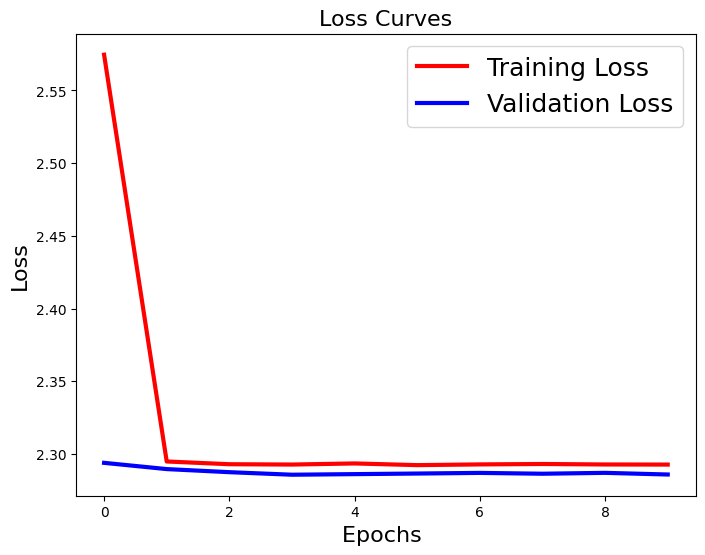

In [ ]:
import matplotlib.pyplot as plt

# Afficher les courbes de loss et d'accuracy
plt.figure(figsize=[8,6])
plt.plot(history_vgg.history['loss'],'r',linewidth=3.0)
plt.plot(history_vgg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Prédictions sur les données de test
y_pred = model_vgg.predict(X_test)

# Convertir les probabilités des classes en prédictions de classes
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Obtenir le rapport de classification
report = classification_report(y_true, y_pred_classes, target_names=class_names)

print(report)

12/12 [==============================] - 20s 2s/step
                               precision    recall  f1-score   support

          n02085620-Chihuahua       0.00      0.00      0.00        30
   n02085782-Japanese_spaniel       0.00      0.00      0.00        42
        n02085936-Maltese_dog       0.15      1.00      0.27        59
           n02086079-Pekinese       0.00      0.00      0.00        20
           n02086240-Shih-Tzu       0.00      0.00      0.00        38
   n02086646-Blenheim_spaniel       0.00      0.00      0.00        40
           n02086910-papillon       0.00      0.00      0.00        35
        n02087046-toy_terrier       0.00      0.00      0.00        31
n02087394-Rhodesian_ridgeback       0.00      0.00      0.00        42
       n02088094-Afghan_hound       0.00      0.00      0.00        47

                     accuracy                           0.15       384
                    macro avg       0.02      0.10      0.03       384
                 weigh

/home/lolonois/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lolonois/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lolonois/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten
from keras.layers import Add, Activation
from keras.models import Model

def residual_module(layer_in, n_filters):
    merge_input = layer_in
    if layer_in.shape[-1] != n_filters:
        merge_input = Conv2D(n_filters, (1,1), padding='same', activation='relu')(layer_in)

    conv1 = Conv2D(n_filters, (3,3), padding='same', activation='relu')(layer_in)
    conv2 = Conv2D(n_filters, (3,3), padding='same', activation='linear')(conv1)

    layer_out = Add()([conv2, merge_input])
    layer_out = Activation('relu')(layer_out)

    return layer_out

# définir la forme de l'entrée du modèle
input_shape = Input(shape=(224, 224, 3))

# Ajouter des modules résiduels
layer = residual_module(input_shape, 64)
layer = residual_module(layer, 64)
layer = residual_module(layer, 64)

# ajouter des couches de pooling et de classification
layer = MaxPooling2D((2,2))(layer)
layer = Flatten()(layer)
output_layer = Dense(num_classes, activation='softmax')(layer)

# Construire le modèle
model_resnet = Model(inputs=input_shape, outputs=output_layer)

# Compiler le modèle
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Définir les paramètres d'entraînement
epochs = 10
batch_size = 32

# Entraînement du modèle
history_resnet = model_resnet.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)


"# Définir les paramètres d'entraînement\nepochs = 10\nbatch_size = 32\n\n# Entraînement du modèle\nhistory_resnet = model_resnet.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)\n"

In [ ]:
import pickle

# Enregistrer l'objet history
with open('models/history_resnet.pkl', 'wb') as f:
      pickle.dump(history_resnet, f)

# Sauvegarder le modèle
model_resnet.save('models/model_resnet.h5')

'import pickle\n\n# Enregistrer l\'objet history\nwith open(\'models/history_resnet.pkl\', \'wb\') as f:\n      pickle.dump("models/history_resnet.pkl", f)\n\n# Sauvegarder le modèle\nmodel_resnet.save(\'models/model_resnet.h5\')'

In [ ]:
import pickle
from tensorflow.keras.models import load_model

# Charger l'objet history
with open('models/history_resnet.pkl', 'rb') as f:
    history_resnet = pickle.load(f)

# Charger le modèle
model_resnet = load_model('models/model_resnet.h5')

In [ ]:
# Évaluation du modèle
score = model_resnet.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 8.547274589538574
Test accuracy: 0.1458333283662796


In [ ]:
# Visualiser la précision et la perte pendant l'entraînement
plt.figure(figsize=[6,4])
plt.plot(history_resnet.history['loss'], 'black', linewidth=2.0)
plt.plot(history_resnet.history['val_loss'], 'blue', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)


AttributeError: 'str' object has no attribute 'history'

<Figure size 600x400 with 0 Axes>

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)